<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/wbqvbi6o6ip0vz55ua5gp17g4f1k7ve9.png" width = 300, align = "center"></a>
# <center>Density-Based Clustering</center>

### <b>Welcome to Lab 4c of Machine Learning 101 with Python.</b>
<p><b>Machine Learning is a form of artificial intelligence (AI), where the system can "learn" without explicitly being coded</b></p>

In this lab exercise, you will learn some popular machine learning algorithms. For <b>supervised learning</b>, we will discuss <b>decision trees</b> and <b>random forests</b>. In <b>unsupervised learning</b>, we will discuss <b>k-means clustering</b>, <b>agglomerative hierarchical clustering</b>, and <b>density-based clustering</b> or <b>DBSCAN</b>.


### Some Notebook Commands Reminders:
<ul>
    <li>Run a cell: CTRL + ENTER</li>
    <li>Create a cell above a cell: a</li>
    <li>Create a cell below a cell: b</li>
    <li>Change a cell to Markdown: m</li>
    
    <li>Change a cell to code: y</li>
</ul>

<b> If you are interested in more keyboard shortcuts, go to Help -> Keyboard Shortcuts </b>

<b> <i> Before starting the lab, please run the following code in order to access the solutions </i> </b>

In [1]:
from IPython.core.display import HTML
HTML("""
<style type="text/css">
    #ans:hover { background-color: black; }
    #ans {padding: 6px; 
        background-color: white; 
        border: green 2px solid;
        font-weight: bold}
</style>
""") 

# <u> Density-Based Clustering </u>
This is the final clustering algorithm we will look at! In this section, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

Import the following libraries:
<ul>
    <li> <b>numpy as np</b> </li>
    <li> <b>DBSCAN</b> from <b>sklearn.cluster</b> </li>
    <li> <b>make_blobs</b> from <b>sklearn.datasets.samples_generator</b> </li>
    <li> <b>StandardScaler</b> from <b>sklearn.preprocessing</b> </li>
    <li> <b>matplotlib.pyplot as plt</b> </li>
</ul> <br>
Remember <b> %matplotlib inline </b> to display plots

In [3]:
import numpy as np
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
%matplotlib inline

Hover over the green box below the answer
<p id = "ans"> <font color = "white"> 
import numpy as np <br>
from sklearn.cluster import DBSCAN <br>
from sklearn.datasets.samples_generator import make_blobs <br>
from sklearn.preprocessing import StandardScaler <br>
import matplotlib.pyplot as plt <br>
%matplotlib inline
</font> </p>

The function below will generate the data points and requires these inputs:
<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation between the clusters. The larger the number, the further the spacing. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>

In [9]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    print(X)
    print(y)
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

The function below will generate the DBSCAN using the input data:
<ul>
    <li> <b>epsilon</b>: A float that describes the maximum distance between two samples for them to be considered as in the same neighborhood. </li>
    <ul> <li> Example: 0.3 </li> </ul>
    <li> <b>minimumSamples</b>: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. </li>
    <ul> <li> Examples: 7 </li> </ul>
</ul>

In [6]:
def displayDBSCAN(epsilon, minimumSamples):
    
    # Initialize DBSCAN with specified epsilon and min. smaples. Fit the model with feature
    # matrix X
    db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
    
    # Create an array of booleans using the labels from db.
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    
    # Replace all elements with 'True' in core_samples_mask that are
    # in the cluster, 'False' if the points are outliers.
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


    # Black color is removed and used for noise instead.
    
    # Remove repetition in labels by turning it into a set.
    unique_labels = set(labels)
    
    # Create colors for the clusters.
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    
    # Plot the points with colors
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)
        
        # Plot the datapoints that are clustered
        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        # Plot the outliers
        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

Use <b>createDataPoints</b> with the <b>3 inputs</b> and store the output into variables <b>X</b> and <b>y</b>.

In [10]:
X,y = createDataPoints( [[4,3], [2,-1], [-1,4]],1500,0.5)

[[ 0.1980365   3.86824578]
 [ 1.88173787 -1.27752858]
 [ 2.58106955 -0.75110537]
 ...
 [ 3.78858642  2.42181141]
 [ 4.40748964  3.54774975]
 [ 1.79447074 -0.97594856]]
[2 1 1 ... 0 0 1]


Hover over the green box below for an example answer
<p id = "ans"> <font color = "white"> 
createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)
</font> </p>

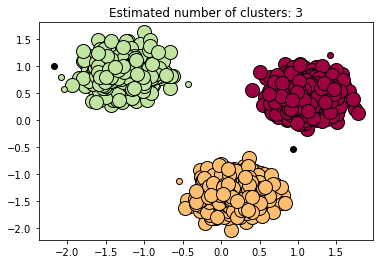

In [8]:
displayDBSCAN(0.3,7)

Hover over the green box below for an example answer
<p id = "ans"> <font color = "white"> 
displayDBSCAN(0.3, 7)
</font> </p>

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0101EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0101EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0101EN_DSX)

---
# Additional Resources
<br>
General Clustering: http://scikit-learn.org/stable/modules/clustering.html 
<br><br>
Density-Based Clustering (DBSCAN): <br>
https://www.youtube.com/watch?v=a69-jHtawEo <br>
https://www.youtube.com/watch?v=5E097ZLE9Sg

<hr>
Copyright &copy; 2016 [Big Data University](https://bigdatauniversity.com/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​